# Calculate BLEU Score

In [13]:
import pandas as pd
import nltk
from nltk.translate.bleu_score import sentence_bleu
from nltk import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('punkt')

# Set model number and file paths
model_number = 4
finetuned_result = f"model_{model_number}/finetuned_results.csv"
pretrained_result = f"model_{model_number}/pretrained_results.csv"

def calculate_bleu(reference, candidate):
    '''
    Calculate BLEU score between a reference and a candidate sentence.
    
    Parameters:
    reference (str): The reference sentence.
    candidate (str): The candidate sentence.
    
    Returns:
    bleu_score (float): The BLEU score of the candidate sentence.
    '''
    # Tokenize the sentences
    reference_tokens = word_tokenize(reference)
    candidate_tokens = word_tokenize(candidate)

    # Calculate BLEU score
    # bleu_score = sentence_bleu([reference_tokens], candidate_tokens)
    bleu_score = sentence_bleu([reference_tokens], candidate_tokens, weights=(1, 0, 0, 0))
    return bleu_score

def calculate_and_format(row):
    bleu_score = calculate_bleu(row['Source Text'], row['Predicted Neutral Text'])
    output = f"Sample: {row.name}\nPredicted Neutral Text: {row['Predicted Neutral Text']}\nSource Text: {row['Source Text']}\nBLEU Score: {bleu_score}\n\n"
    return bleu_score, output

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\10150\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Pretrained Model Evaluation

## Fine-tuned Model BLEU Score

In [14]:
# Load the data from the CSV file with 'ISO-8859-1' encoding
df_finetuned = pd.read_csv(finetuned_result, encoding='ISO-8859-1')

# Apply the function to each row of the DataFrame
df_finetuned['bleu_score'], outputs = zip(*df_finetuned.apply(calculate_and_format, axis=1))

# Write the outputs to the file
with open('output_finetuned.txt', 'w') as f:
    f.writelines(outputs)

# Print the counts
print(f"Total number of sentence pairs used for calculation: {df_finetuned.shape[0]}")
print(f"Number of BLEU scores less than 0.1: {(df_finetuned['bleu_score'] < 0.1).sum()}")

Total number of sentence pairs used for calculation: 257
Number of BLEU scores less than 0.1: 7


c:\Users\10150\anaconda3\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\10150\anaconda3\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\10150\anaconda3\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnin

## Pretrained Model BLEU Score

In [15]:
# Load the data from the CSV file with 'ISO-8859-1' encoding
df_pretrained = pd.read_csv(pretrained_result, encoding='ISO-8859-1')

# Apply the function to each row of the DataFrame
df_pretrained['bleu_score'], outputs = zip(*df_pretrained.apply(calculate_and_format, axis=1))

# Write the outputs to the file
with open('output_pretrained.txt', 'w') as f:
    f.writelines(outputs)

# Print the counts
print(f"Total number of sentence pairs used for calculation: {df_pretrained.shape[0]}")
print(f"Number of BLEU scores less than 0.1: {(df_pretrained['bleu_score'] < 0.1).sum()}")

Total number of sentence pairs used for calculation: 179
Number of BLEU scores less than 0.1: 102


c:\Users\10150\anaconda3\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\10150\anaconda3\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\10150\anaconda3\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnin

## Visualizations

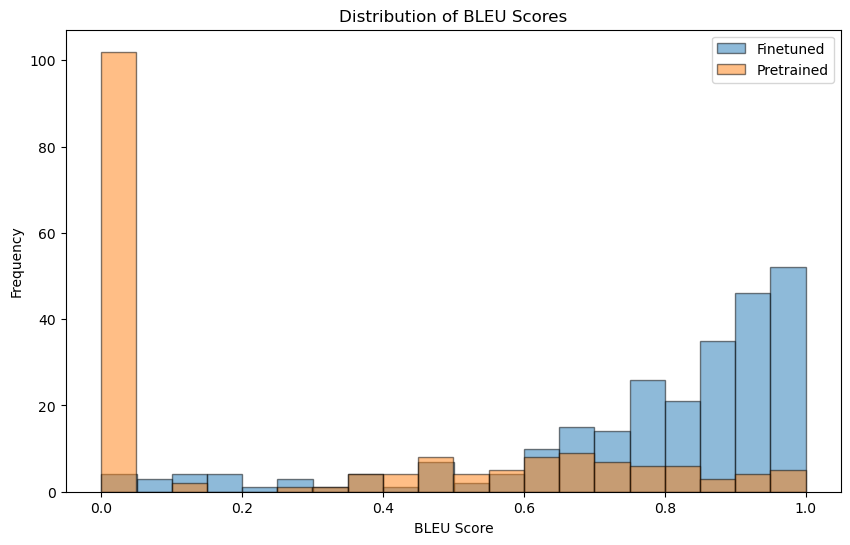

In [16]:
# Create a new figure
plt.figure(figsize=(10, 6))

# Plot a histogram of the BLEU scores for the finetuned model
plt.hist(df_finetuned['bleu_score'], bins=20, edgecolor='black', alpha=0.5, label='Finetuned')

# Plot a histogram of the BLEU scores for the pretrained model
plt.hist(df_pretrained['bleu_score'], bins=20, edgecolor='black', alpha=0.5, label='Pretrained')

# Add a title and labels
plt.title('Distribution of BLEU Scores')
plt.xlabel('BLEU Score')
plt.ylabel('Frequency')

# Add a legend
plt.legend()

# Show the plot
plt.show()

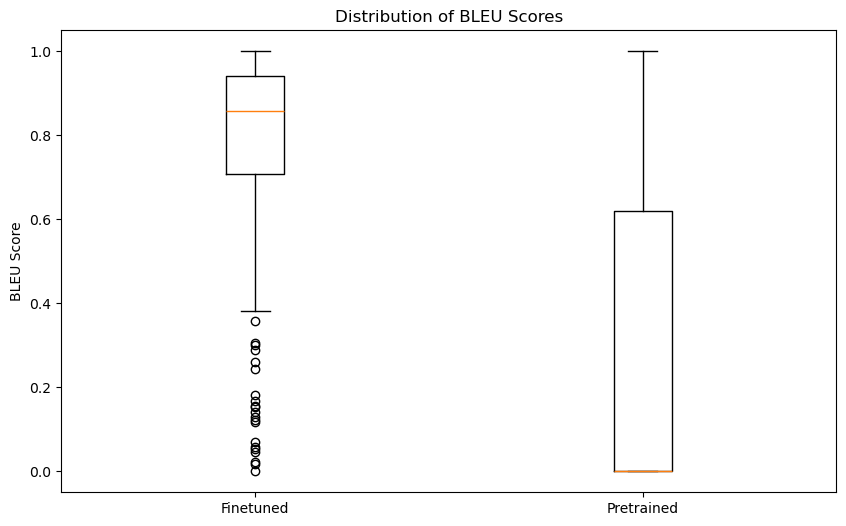

In [17]:
# Create a new figure
plt.figure(figsize=(10, 6))

# Create a box plot for the BLEU scores of the finetuned and pretrained models
plt.boxplot([df_finetuned['bleu_score'], df_pretrained['bleu_score']], labels=['Finetuned', 'Pretrained'])

# Add a title and labels
plt.title('Distribution of BLEU Scores')
plt.ylabel('BLEU Score')

# Show the plot
plt.show()

c:\Users\10150\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\10150\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


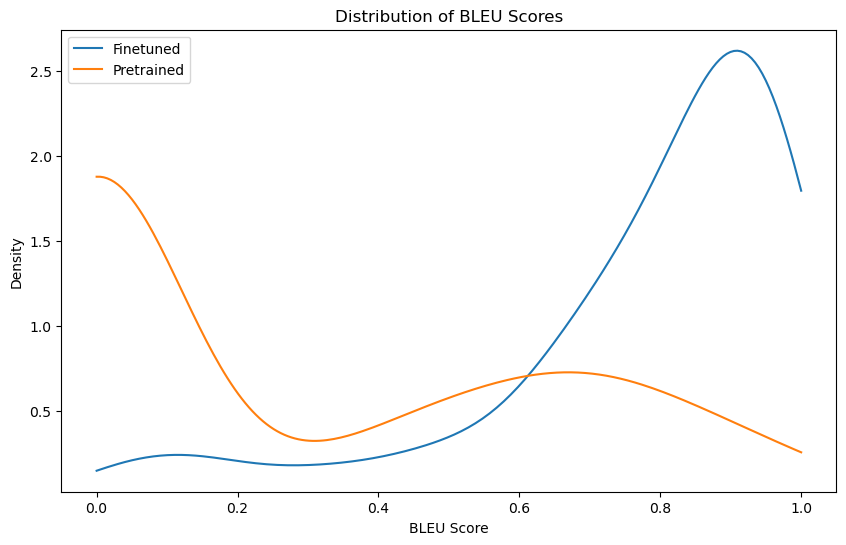

In [18]:
# Create a new figure
plt.figure(figsize=(10, 6))

# Create a KDE plot for the BLEU scores of the finetuned model
sns.kdeplot(df_finetuned['bleu_score'], label='Finetuned', clip=(0, 1))

# Create a KDE plot for the BLEU scores of the pretrained model
sns.kdeplot(df_pretrained['bleu_score'], label='Pretrained', clip=(0, 1))

# Add a title and labels
plt.title('Distribution of BLEU Scores')
plt.xlabel('BLEU Score')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()